In [1]:
import numpy as np
seed_ = 20200218
np.random.seed(seed_)

import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
color_palette = sns.color_palette("muted")
sns.set_palette(color_palette)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.callbacks import EarlyStopping

from PIL import Image
from PIL import ImageOps

Using TensorFlow backend.


In [2]:
df = pd.read_csv("./data/train.csv")

In [3]:
X = df.iloc[:, 1:]
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = df['label']
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [5]:
X.values.shape

(42000, 784)

In [6]:
X_ = X.values.reshape(X.values.shape[0], -1, 28, 28)

# normalization

X_ = X_/255

In [7]:
onehot_y  = pd.get_dummies(y).values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_, onehot_y, test_size=0.3, random_state=seed_)

In [9]:
X_train.shape, X_test.shape

((29400, 1, 28, 28), (12600, 1, 28, 28))

In [10]:
y_train.shape, y_test.shape

((29400, 10), (12600, 10))

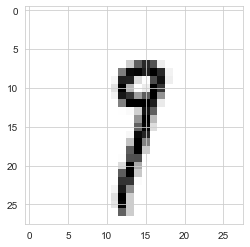

In [11]:
plt.imshow(X_train[0][0], cmap="Greys")

# 
## model

[keras conv2d](https://keras.io/api/layers/convolution_layers/convolution2d/)

In [12]:
model = Sequential()

model.add(Conv2D(28, kernel_size=(4, 4), input_shape=(1, 28, 28), activation='relu', padding='same'))
model.add(Conv2D(28, kernel_size=(4, 4), activation='relu', padding='same'))
model.add(Flatten())
# output layer
model.add(Dense(10, activation='softmax'))


model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])
early_stop = EarlyStopping(monitor='val_accuracy', patience=3)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 28, 28)         12572     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 28, 28)         12572     
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 32,994
Trainable params: 32,994
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stop])

Train on 23520 samples, validate on 5880 samples
Epoch 1/20
23520/23520 [==============================] - 5s 228us/step - loss: 0.4457 - accuracy: 0.8691 - val_loss: 0.2229 - val_accuracy: 0.9355
Epoch 2/20
23520/23520 [==============================] - 5s 226us/step - loss: 0.1878 - accuracy: 0.9446 - val_loss: 0.1609 - val_accuracy: 0.9544
Epoch 3/20
23520/23520 [==============================] - 5s 223us/step - loss: 0.1336 - accuracy: 0.9603 - val_loss: 0.1130 - val_accuracy: 0.9663
Epoch 4/20
23520/23520 [==============================] - 5s 231us/step - loss: 0.1023 - accuracy: 0.9704 - val_loss: 0.0957 - val_accuracy: 0.9701
Epoch 5/20
23520/23520 [==============================] - 5s 217us/step - loss: 0.0845 - accuracy: 0.9748 - val_loss: 0.0991 - val_accuracy: 0.9709
Epoch 6/20
23520/23520 [==============================] - 5s 219us/step - loss: 0.0707 - accuracy: 0.9796 - val_loss: 0.0818 - val_accuracy: 0.9741
Epoch 7/20
23520/23520 [==============================] - 5s 23

In [14]:
predicted_ytrain = model.predict(X_train)
predicted_ytest = model.predict(X_test)

In [15]:
predicted_ytrain.shape

(29400, 10)

In [16]:
model.predict_classes(X_train)

array([9, 5, 8, ..., 3, 1, 2], dtype=int64)

In [17]:
np.argmax(predicted_ytrain, axis=1)

array([9, 5, 8, ..., 3, 1, 2], dtype=int64)

# 
## Model Evaluation

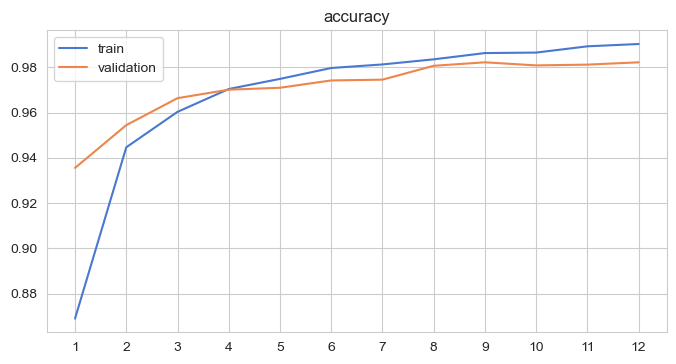

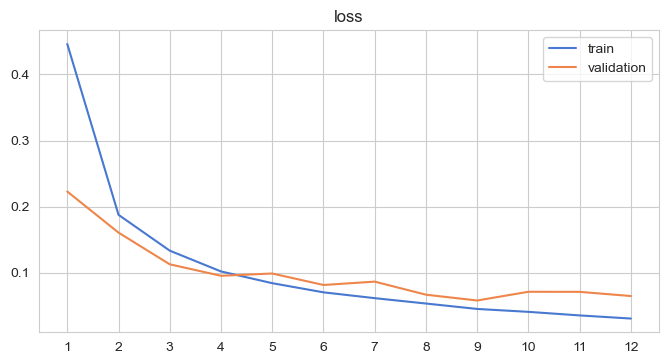

In [18]:
epoch_x = np.arange(1, len(history.history['accuracy'])+1)

plt.figure(figsize=(8, 4), dpi=100)
sns.lineplot(epoch_x, history.history['accuracy'], label='train')
sns.lineplot(epoch_x, history.history['val_accuracy'], label='validation')
plt.title('accuracy')
plt.xticks(epoch_x)
plt.show()

plt.figure(figsize=(8, 4), dpi=100)
sns.lineplot(epoch_x, history.history['loss'], label='train')
sns.lineplot(epoch_x, history.history['val_loss'], label='validation')
plt.title('loss')
plt.xticks(epoch_x)
plt.show()

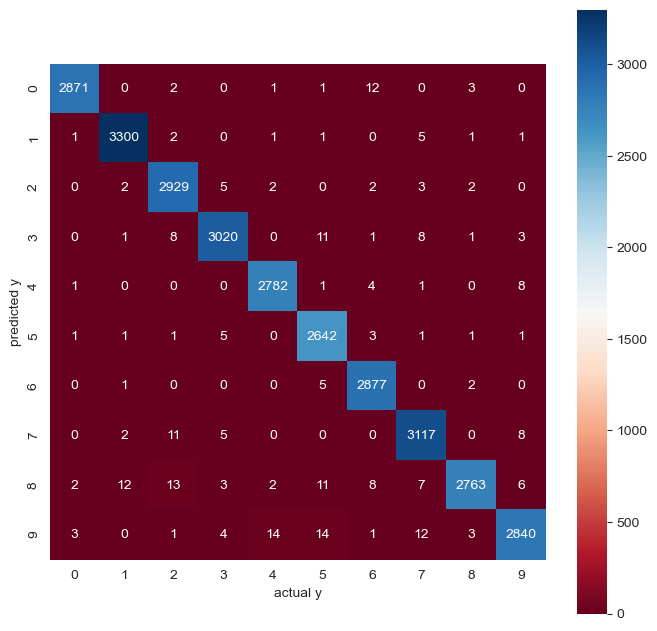

In [19]:
confusion_mat = confusion_matrix(np.argmax(y_train, axis=1), model.predict_classes(X_train))

plt.figure(figsize=(8, 8), dpi=100)
sns.heatmap(confusion_mat, square=True, annot=True, cmap='RdBu', fmt="d")
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.show()

# 
## Visaulize Result

In [20]:
train_df = pd.DataFrame(X_train.squeeze().reshape(X_train.squeeze().shape[0], 28*28))
train_df['label'] = np.argmax(y_train, axis=1)

test_df = pd.DataFrame(X_test.squeeze().reshape(X_test.squeeze().shape[0], 28*28))
test_df['label'] = np.argmax(y_test, axis=1)

In [21]:
train_df['predicted_label'] = np.argmax(predicted_ytrain, axis=1)
test_df['predicted_label'] = np.argmax(predicted_ytest, axis=1)

In [22]:
train_df[train_df['label'] != train_df['predicted_label']]

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,label,predicted_label
49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,4
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,7
602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,6
29041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,6
29214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,6
29296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,5


In [23]:
def plot_img(img_px, actual_label, predicted_label):
    fig = plt.figure(figsize=(5, 5), dpi=100)
    plt.imshow(img_px, cmap='Greys')
    
    plt.title(f"{actual_label=:.0f}, {predicted_label=:.0f}")
    plt.show()

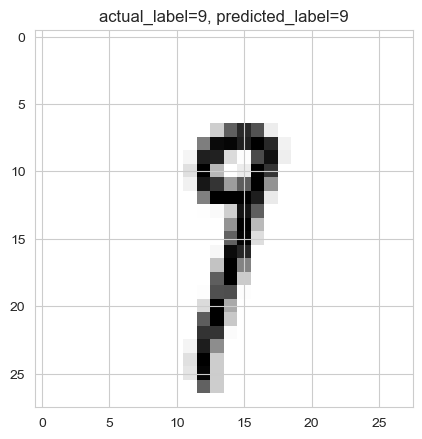

In [24]:
plot_img(train_df.iloc[0, 0:784].values.reshape(28, 28), train_df.iloc[0]['label'], train_df.iloc[0]['predicted_label'])

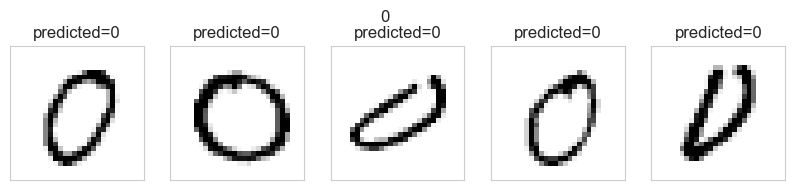

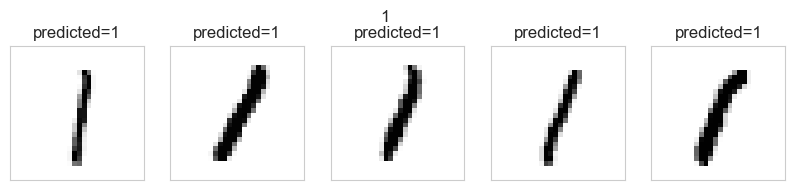

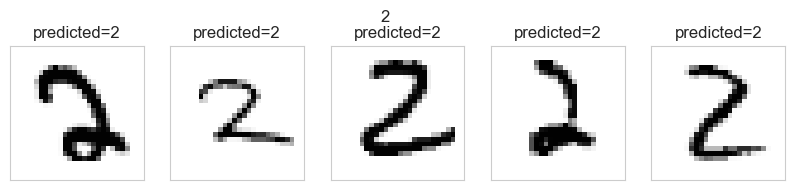

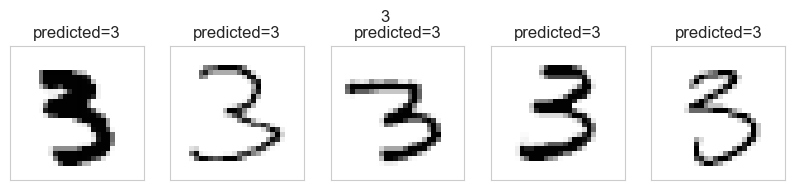

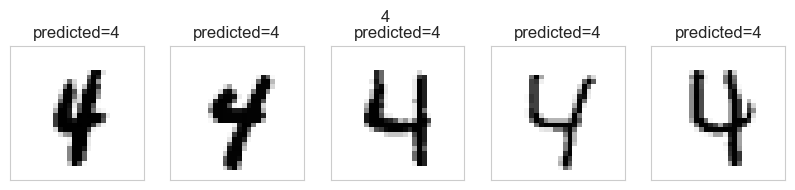

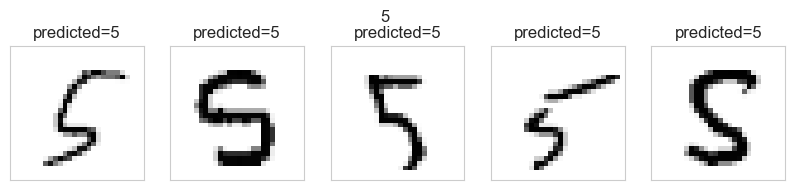

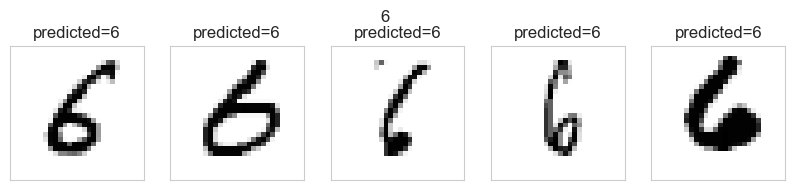

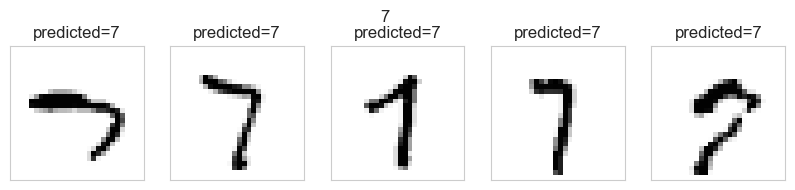

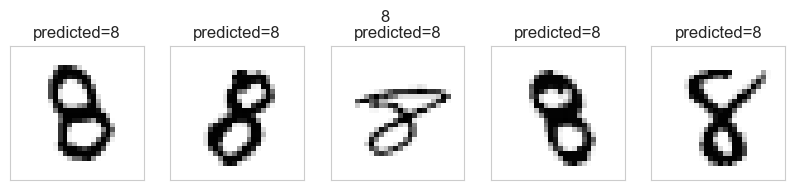

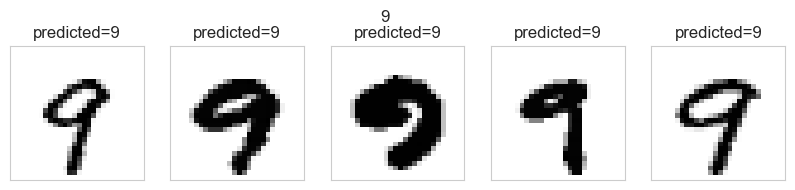

In [25]:
for digit in range(0, 10):
    true_positive = train_df[(train_df['label'] == train_df['predicted_label']) & (train_df['label'] == digit)].sample(5)
    
    fig, axes = plt.subplots(1, 5, dpi=100, figsize=(10, 2))
    fig.subplots_adjust(top=0.8)
    for i, ax in enumerate(axes):
        ax.imshow(true_positive.iloc[i, 0:784].values.reshape(28, 28), cmap='Greys')
        ax.set_title(f"predicted={true_positive.iloc[i]['predicted_label']:.0f}")
        plt.suptitle(digit)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

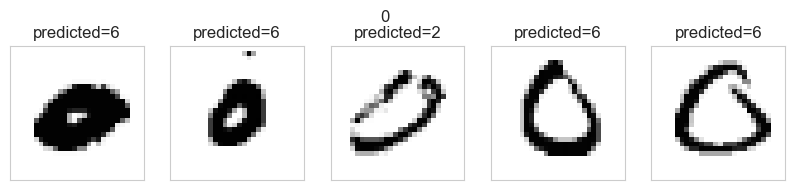

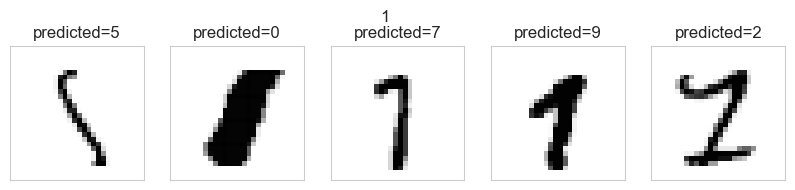

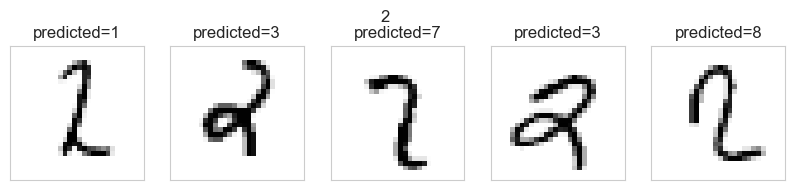

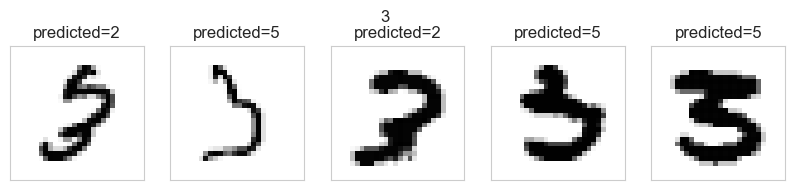

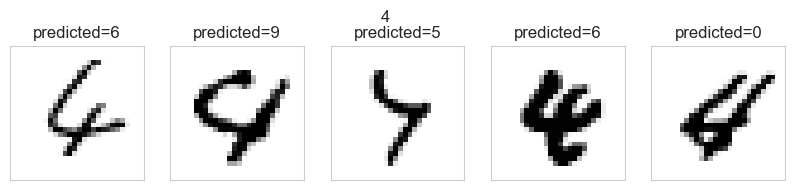

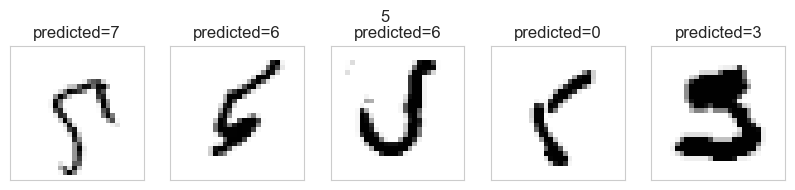

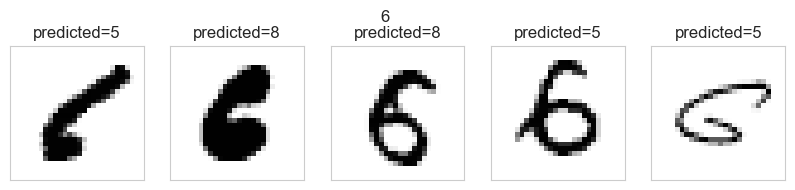

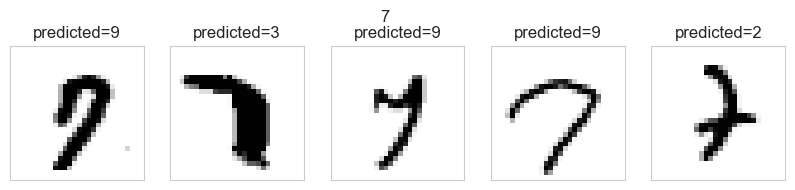

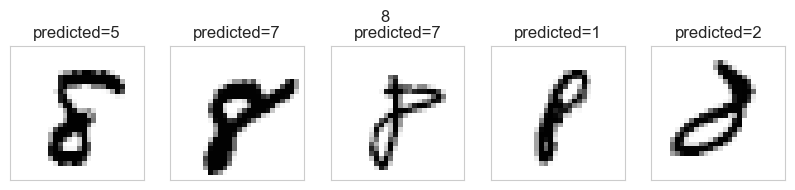

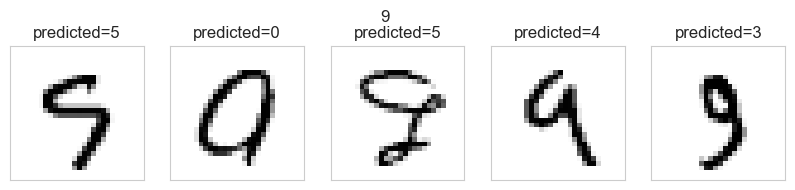

In [26]:
for digit in range(0, 10):
    err = train_df[(train_df['label'] != train_df['predicted_label']) & (train_df['label'] == digit)].sample(5)
    
    fig, axes = plt.subplots(1, 5, dpi=100, figsize=(10, 2))
    fig.subplots_adjust(top=0.8)
    for i, ax in enumerate(axes):
        ax.imshow(err.iloc[i, 0:784].values.reshape(28, 28), cmap='Greys')
        ax.set_title(f"predicted={err.iloc[i]['predicted_label']:.0f}")
        plt.suptitle(digit)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

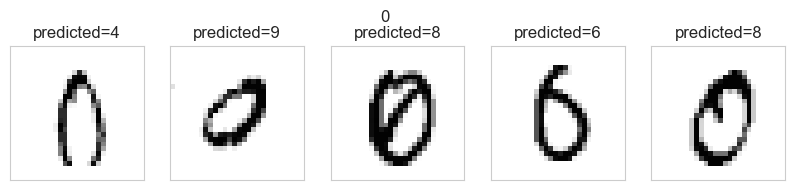

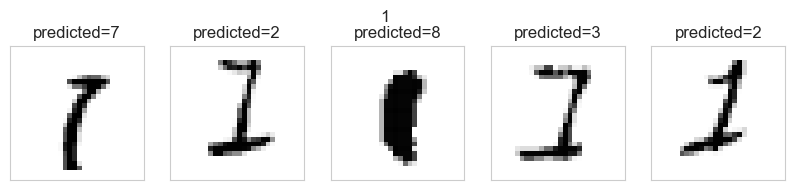

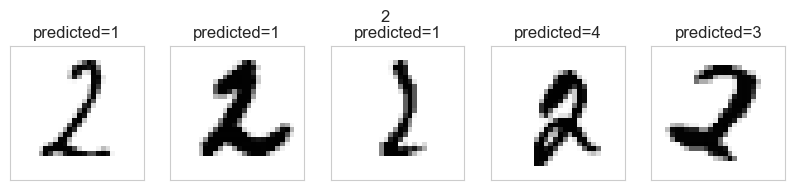

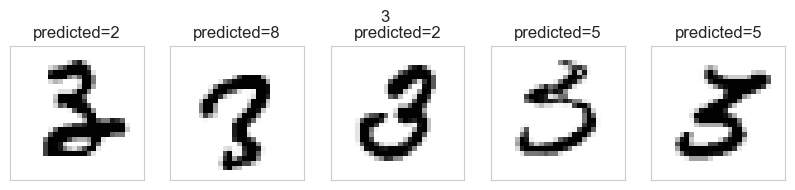

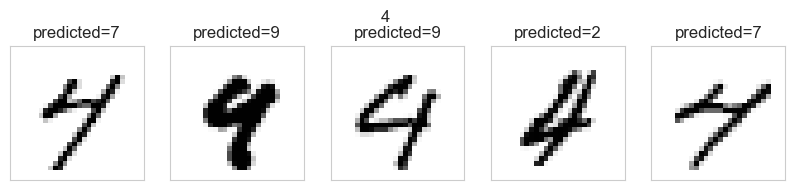

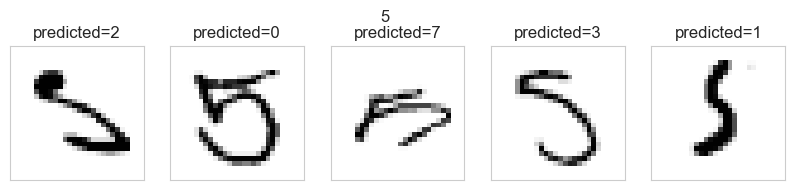

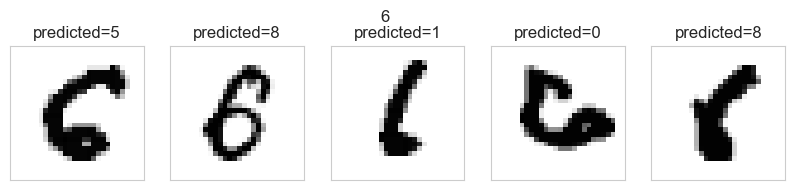

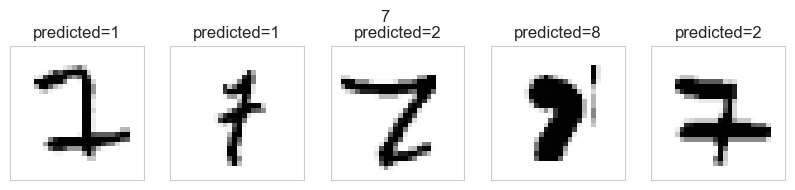

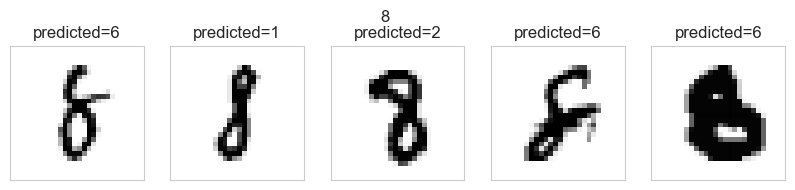

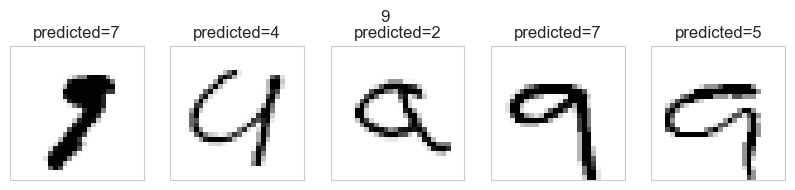

In [27]:
for digit in range(0, 10):
    err = test_df[(test_df['label'] != test_df['predicted_label']) & (test_df['label'] == digit)].sample(5)
    
    fig, axes = plt.subplots(1, 5, dpi=100, figsize=(10, 2))
    fig.subplots_adjust(top=0.8)
    for i, ax in enumerate(axes):
        ax.imshow(err.iloc[i, 0:784].values.reshape(28, 28), cmap='Greys')
        ax.set_title(f"predicted={err.iloc[i]['predicted_label']:.0f}")
        plt.suptitle(digit)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# 
## predict my handwritting

In [28]:
my_images = [np.array(ImageOps.invert(Image.open(f'./my_handwrite/{i}.png').convert('L'))) for i in range(0, 10)]
my_images = np.array(my_images) / 255

In [29]:
my_images.shape

(10, 28, 28)

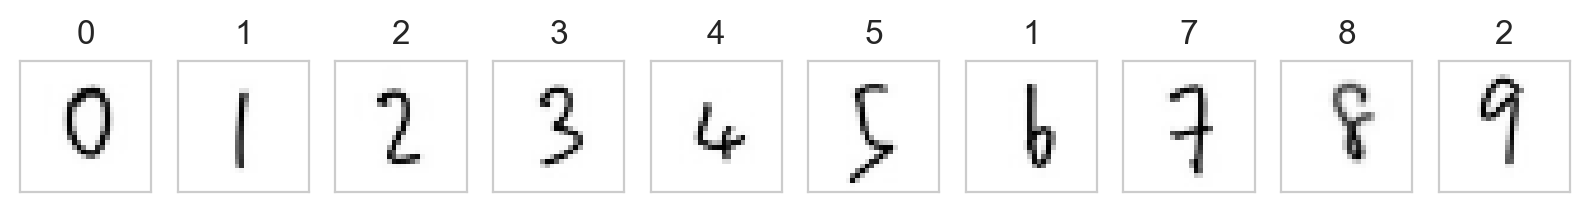

In [30]:
fig, axes = plt.subplots(1, 10, figsize=(10, 10), dpi=200)

predicted_my_hadwrite = model.predict_classes(my_images.reshape(10, -1, 28, 28))

for digit in range(0, 10):
    axes[digit].imshow(my_images[digit], cmap='Greys')
    axes[digit].set_title(predicted_my_hadwrite[digit])
    axes[digit].get_yaxis().set_visible(False)
    axes[digit].get_xaxis().set_visible(False)